# Effect of Sleep Deprivation on Cognitive Task Performance - EEG Analysis

## Overview

The research topic which we focused on was how brainwaves measured by an EEG change depending on sleep, and the how those brainwaves translated to study participants physical condition. Our approach was first to organize the data, as there were multiple metrics which had no data from many participants in the study, as well as EEG data which we had to make into a dataframe, and we also simplified datapoints to be quantitative only, to columns such as sleep time or total score. After doing data wranging and EDA, we ran several machine learning models on how EEG data and sleep time is related to the PSQI score, of which random forest performed the best, though our mean squared error was quite large since the sample size was small.

## Research Question

How do brainwave activities, as measured by EEG after a night of sleep deprivation, correlate with symptoms of sleep deprivation and performances on cognitive tasks through the Pittsburgh Sleep Quality Index (PSQI)?


## Background & Prior Work

Sleep is one of the most essential biological functions that supports our day-to-day cognitive and physiological processes. On average, we spend one third of our lives sleeping, which underscores its importance in maintaining overall health and well-being. However, in the current fast-paced world, sleep deprivation has become a common problem for many people. Although sacrificing a few hours of sleep every so often may seem inconsequential, numerous research has demonstrated that sleep deprivation can significantly impair various daily functions, affecting both physical and mental health. Specifically, neuroscience studies have investigated on a more granular level the effect of inadequate sleep on specific cognitive processes and neural connections.

Electrophenocolography (EEG) is a great tool in studying the neural circuitry of sleep as it provides a direct measure of brain activity. Many studies have utilized EEG recordings to investigate the effect of lack of sleep on neural activity. A study done by Alkadhi et al found that a prolonged period of sleep deprivation can impair synaptic efficacy and lead to a decrease in memory retention and decision-making abilities (Alkadhi, 2013). A study by Mohammad A. et al (Khan, 2023) found significant changes in the medial prefrontal cortex (mPFC) in participants who underwent short-term sleep deprivation, illustrating a correlation between the mPFC and attention centers to compensate for the reduction in cognitive function during sleep deprivation. Another study The Consequences of Sleep Deprivation on Cognitive Performance explores how a lack of sleep impacts the brain in terms of the major cognitive functions like attention, working memory, and emotional regulation. They found a correlation between impaired attention and memory with decreased activity in the dorsolateral prefrontal cortex, as well as an association between sleep deprivation and heightened emotional activity in the amygdala (Krause, 2017). These previous studies have all explored the neural underpinnings of sleep deprivation and identified specific brain regions that are most affected by it. They provide a foundation upon which we can perform our analysis for the project.

## Hypothesis

We hypothesized that EEG signals have a correlation with symptoms of sleep deprivation and performances on cognitive tasks (PSQI) because brainwave activities under sleep deprivation should have some deviation from those under normal sleep condition. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## Data Analysis

- PVT: Psychomotor Vigilance Task
- PANAS: Positive and Negative Affect Schedule
- ATQ: Automatic Thoughts Questionnaire
- SAI: State Anxiety Inventory
- SSS: Stanford Sleepiness Scale
- KSS: Karolinska Sleepiness Scale
- PSQI: Pittsburgh Sleep Quality Index

### 1.  Data Wrangling

In [2]:
df = pd.read_csv('participants.tsv', sep='\t', header=0)
df.head()

,participant_id,Gender,Age,SessionOrder,EEG_SamplingTime_Open_NS,EEG_SamplingTime_Closed_NS,EEG_SamplingTime_Open_SD,EEG_SamplingTime_Closed_SD,PVT_SamplingTime_NS,PVT_SamplingTime_SD,...,EQ,Buss_Perry,PSQI_GlobalScore,PSQI_item1,PSQI_item2,PSQI_item3,PSQI_item4,PSQI_item5,PSQI_item6,PSQI_item7
0,sub-01,M,22,NS->SD,8:57:52,9:04:40,8:18:28,8:25:34,9:27:23,9:23:08,...,NaN,NaN,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,sub-02,M,21,NS->SD,9:47:46,9:53:24,8:54:10,8:59:50,10:16:59,10:00:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-03,F,19,NS->SD,8:49:46,8:55:38,9:58:36,10:04:08,8:45:04,9:34:13,...,NaN,NaN,7.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0
3,sub-04,M,22,NS->SD,9:53:56,9:59:34,9:07:02,9:12:26,10:05:35,10:06:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-05,F,18,NS->SD,20:37:12,20:47:34,9:09:00,9:14:34,21:01:57,10:07:33,...,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
print(df.shape) # 71 participants
df.columns

(71, 41)


Index(['participant_id', 'Gender', 'Age', 'SessionOrder',
       'EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Closed_NS',
       'EEG_SamplingTime_Open_SD', 'EEG_SamplingTime_Closed_SD',
       'PVT_SamplingTime_NS', 'PVT_SamplingTime_SD', 'PVT_item1_NS',
       'PVT_item2_NS', 'PVT_item3_NS', 'PVT_item1_SD', 'PVT_item2_SD',
       'PVT_item3_SD', 'PANAS_P_NS', 'PANAS_P_SD', 'PANAS_N_NS', 'PANAS_N_SD',
       'ATQ_NS', 'ATQ_SD', 'SAI_NS', 'SAI_SD', 'SSS_NS', 'SSS_SD', 'KSS_NS',
       'KSS_SD', 'SleepDiary_item1_NS', 'SleepDiary_item2_NS',
       'SleepDiary_item3_NS', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore',
       'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5',
       'PSQI_item6', 'PSQI_item7'],
      dtype='object')

In [4]:
df.isnull().sum() # check number of null values in each column

participant_id                 0
Gender                         0
Age                            0
SessionOrder                   0
EEG_SamplingTime_Open_NS       0
EEG_SamplingTime_Closed_NS    33
EEG_SamplingTime_Open_SD       0
EEG_SamplingTime_Closed_SD    33
PVT_SamplingTime_NS           34
PVT_SamplingTime_SD           35
PVT_item1_NS                  40
PVT_item2_NS                  40
PVT_item3_NS                  40
PVT_item1_SD                  34
PVT_item2_SD                  34
PVT_item3_SD                  34
PANAS_P_NS                     0
PANAS_P_SD                     3
PANAS_N_NS                     0
PANAS_N_SD                     3
ATQ_NS                        44
ATQ_SD                        46
SAI_NS                        40
SAI_SD                        40
SSS_NS                        33
SSS_SD                        34
KSS_NS                        38
KSS_SD                        38
SleepDiary_item1_NS           18
SleepDiary_item2_NS           18
SleepDiary

As we can see, there're multiple columns which have half or more null values in the data. For the sake of data quality, we will drop the columns which have more than 30 null values. Additionally, we will drop the columns for sample time as those do not describe the sleep or performance on tests. We will also be dropping the PSQI individual columns as there exists a PSQI-GlobalScore column making those redundant. 

In [5]:
todrop = list({'EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Open_SD', 'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5', 'PSQI_item6', 'PSQI_item7'})
for column in df.columns:
    if df[column].isnull().sum() >= 30:
        todrop.append(column)
df = df.drop(columns=todrop)
df.head()

,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore
0,sub-01,M,22,NS->SD,37,32.0,10,11.0,NaN,NaN,NaN,NaN,NaN,4.0
1,sub-02,M,21,NS->SD,28,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-03,F,19,NS->SD,27,21.0,22,29.0,NaN,NaN,NaN,NaN,NaN,7.0
3,sub-04,M,22,NS->SD,31,29.0,12,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-05,F,18,NS->SD,35,29.0,19,18.0,NaN,NaN,NaN,NaN,NaN,3.0


#### Next we want to drop the null values --> down to 50 participants

In [6]:
print(df.shape)
df = df.dropna()
print(df.shape)

(71, 14)
(50, 14)


In [7]:
# age of participants ranges from 17 to 23 - similar age group
df['Age'].describe() 

count    50.000000
mean     20.020000
std       1.518458
min      17.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      23.000000
Name: Age, dtype: float64

In [8]:
# relatively equal in terms of gender distribution
df['Gender'].value_counts()

Gender
F    26
M    24
Name: count, dtype: int64

In [9]:
sleeptime = list(df['SleepDiary_item1_NS'])
waketime = list(df['SleepDiary_item2_NS'])
timedif = list()
for i in range(0, len(sleeptime)):
    sleeptime[i] = str(sleeptime[i])
    waketime[i] = str(waketime[i])
    #skip null values
    if sleeptime[i].upper() == 'NAN' or waketime[i].upper() == 'NAN':
        timedif.append('NaN')
        continue

    #format it to be xx:yy, prolly could do str.split but im braindead lmao
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    #deal with wraparound, just add 12 to both so they're in same day
    if int(sleeptime[i][0:2]) > 18:
        sleeptime[i] = str((int(sleeptime[i][0:2]) + 12)%24) + sleeptime[i][2:]
        waketime[i] = str((int(waketime[i][0:2]) + 12)%24) + waketime[i][2:]

    #format it to be xx:yy again
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    mindiff = int(waketime[i][3:]) - int(sleeptime[i][3:])
    if mindiff < 0:
        mindiff = mindiff%60
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2]) - 1
    else:
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2])
    #if len(str(mindiff)) == 1:
    #    mindiff = '0' + str(mindiff)
    mindiff += 60*hrdiff
    #get actual difference between times in minutes
    #timedif.append("{h}:{m}".format(h = hrdiff, m = mindiff))
    timedif.append(mindiff)
df['Sleep_time'] = timedif
print(timedif)

[490, 360, 477, 469, 515, 490, 540, 510, 470, 460, 480, 520, 450, 420, 510, 420, 310, 440, 520, 430, 442, 370, 280, 470, 445, 471, 420, 540, 450, 417, 493, 535, 583, 410, 488, 415, 360, 520, 512, 400, 364, 530, 588, 538, 480, 600, 420, 520, 450, 195]


### Data Visualization

#### Since the EEG data files are too large to be put on github, we pulled them locally and performed transformations to reduce the amount of data. Here're some example raw eeg data before any transformations.

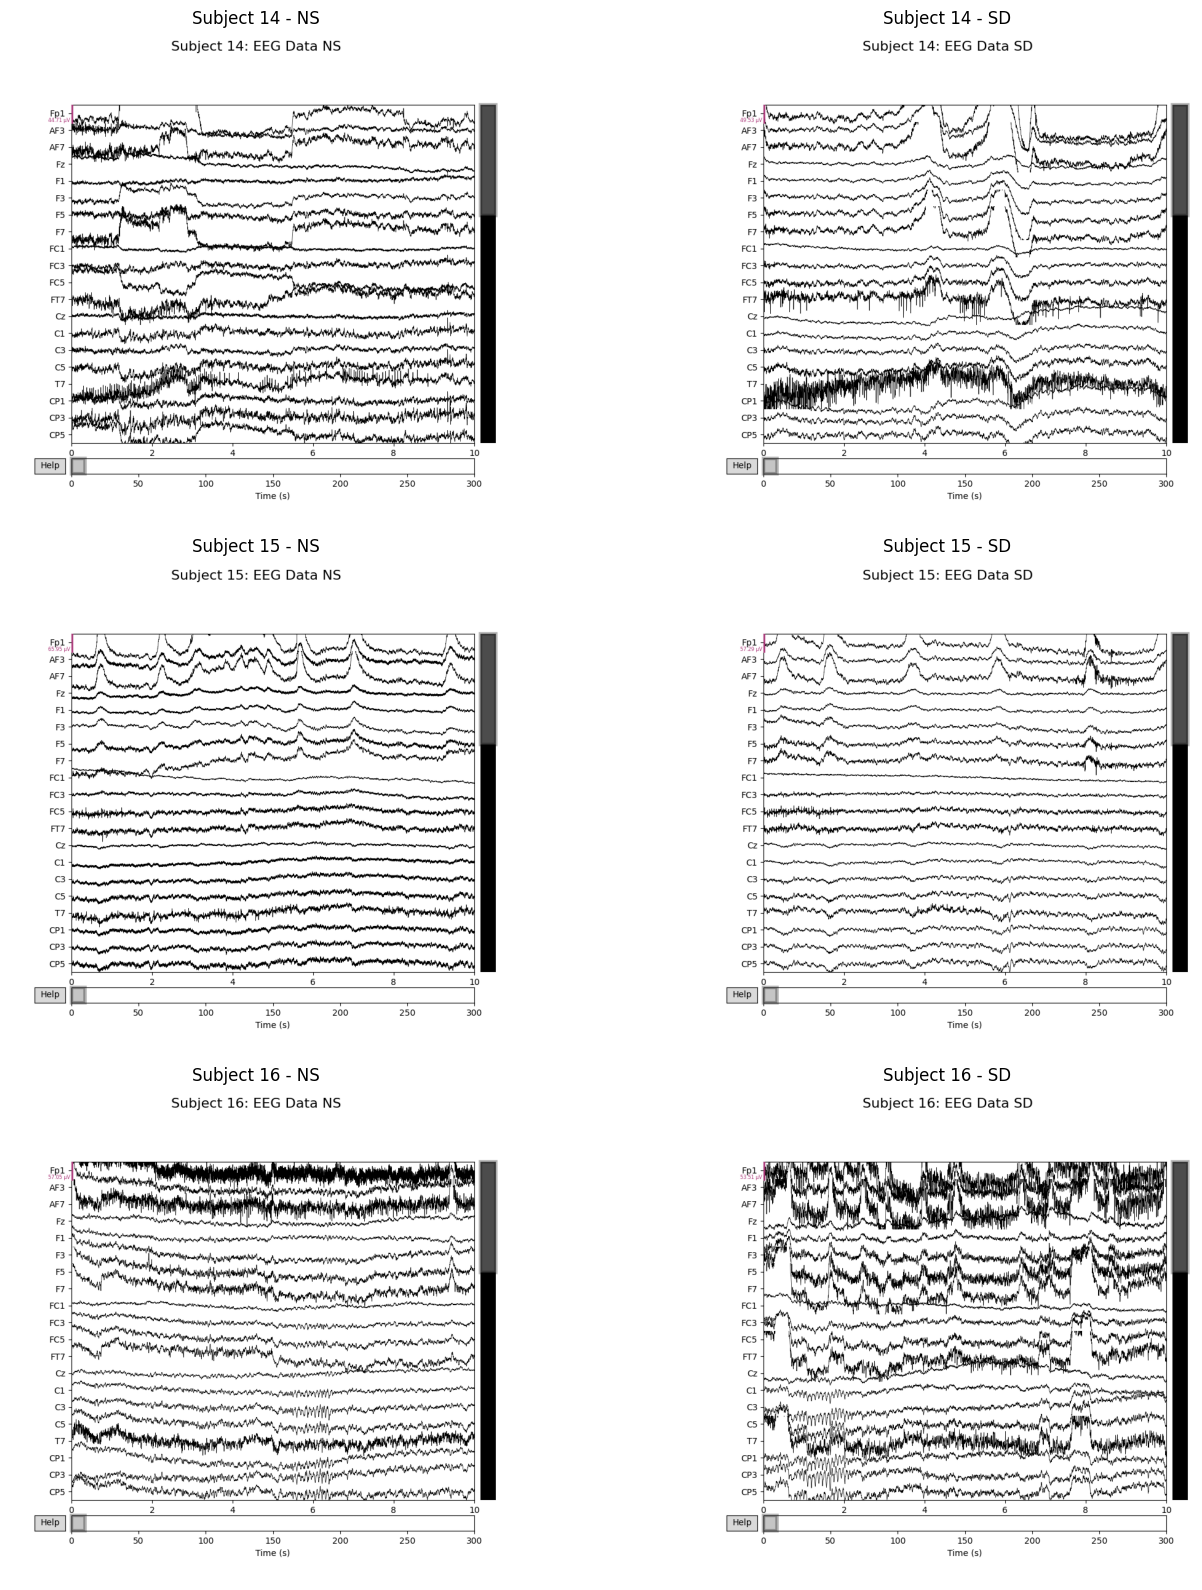

In [10]:
# sample EEG data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
axes = axes.flatten()
idx = 0

for i in [14, 15, 16]:
    for j in ['NS', 'SD']:
        img = mpimg.imread(f'EEG_Subject_{i}_{j}.png')
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Subject {i} - {j}') 
        idx += 1
        
plt.tight_layout()
plt.show()

To reduce the size of the eeg data, we extracted the frequency band powers from the raw signals to use as input to the ML model. The 5 different frequency bands {delta, theta, alpha, beta, gamma} all associate with different states of cognitive activities, so it may be more helpful to look at these frequency bands separately. To do this, we calculated the average power for each of the 61 channels across each of the 5 frequency bands.

In [11]:
# code for PSD (power spectral density) calculation & appending to the df (runs locally)
# bands = {'delta': (1, 4),
#          'theta': (4, 8),
#          'alpha': (8, 12),
#          'beta': (12, 30),
#          'gamma': (30, 45)}

# for band in bands.keys():
#     feature_df[band] = None

# for i, row in feature_df.iterrows():
#     subject_id = row['participant_id'][-2:]
#     if (subject_id == '28') or (subject_id == '44') :
#         continue
#     if (row['SessionOrder'] == 'SD->NS') & (row['Condition'] == 'SD'):
#         bids_path = mne_bids.BIDSPath(subject=subject_id, session='1', task='eyesopen', datatype='eeg', root='data')
#     elif (row['SessionOrder'] == 'NS->SD') & (row['Condition'] == 'NS'):
#         bids_path = mne_bids.BIDSPath(subject=subject_id, session='1', task='eyesopen', datatype='eeg', root='data')
#     else:
#         bids_path = mne_bids.BIDSPath(subject=subject_id, session='2', task='eyesopen', datatype='eeg', root='data')
        
#     raw = mne_bids.read_raw_bids(bids_path)
#     raw.load_data()
#     data, times = raw[:, :]
#     sfreq = raw.info['sfreq']
#     f, Pxx = scipy.signal.welch(data[0], fs=sfreq, nperseg=1024, noverlap=512)

#     # calculate average power of each channel (61) for each frequency band (5)
#     avg_band_powers = {band: np.zeros((data.shape[0],)) for band in bands}

#     for channel in range(data.shape[0]):
#         f, Pxx = scipy.signal.welch(data[channel], fs=sfreq, nperseg=1024, noverlap=512)
        
#         for band, (fmin, fmax) in bands.items():
#             freq_mask = (f >= fmin) & (f <= fmax)
#             avg_band_powers[band][channel] = np.mean(Pxx[freq_mask])

#     # append the freq info dict to feature_df
#     for band in bands.keys():
#         feature_df.at[i, band] = avg_band_powers[band]

In [12]:
feature_df = pd.read_csv('cleaned_feature_df.csv', header=0, index_col=0)
print(feature_df.shape)
feature_df.head()

(96, 312)


,participant_id,Gender,Age,SessionOrder,Sleep_time,PSQI_GlobalScore,Condition,delta_power_0,delta_power_1,delta_power_2,...,gamma_power_51,gamma_power_52,gamma_power_53,gamma_power_54,gamma_power_55,gamma_power_56,gamma_power_57,gamma_power_58,gamma_power_59,gamma_power_60
0,sub-14,1,21,SD->NS,490,2.0,NS,4.788007e-11,1.141000e-11,2.504680e-11,...,1.520246e-13,1.117684e-13,6.435905e-14,7.924735e-14,9.265739e-14,9.255902e-14,1.428739e-13,1.481757e-13,2.220861e-13,5.610609e-13
1,sub-14,1,21,SD->NS,0,2.0,SD,2.939095e-11,2.186014e-12,1.586329e-11,...,1.005780e-12,1.255216e-13,2.255881e-13,4.472645e-13,2.740306e-12,9.482242e-13,1.949883e-13,2.859245e-12,1.205954e-13,1.256782e-12
2,sub-15,1,19,SD->NS,360,6.0,NS,3.683719e-11,8.858381e-12,2.194359e-11,...,1.746865e-13,2.144845e-13,9.620191e-14,1.234551e-13,1.635104e-13,1.932006e-13,1.381132e-13,1.756676e-13,2.887176e-13,4.445127e-13
3,sub-15,1,19,SD->NS,0,6.0,SD,3.649591e-11,8.306927e-12,1.852600e-11,...,1.373348e-13,1.611543e-13,7.960736e-14,1.016051e-13,1.321705e-13,1.567824e-13,1.198827e-13,1.460854e-13,2.584593e-13,3.554343e-13
4,sub-16,2,22,SD->NS,477,8.0,NS,1.280668e-10,3.105071e-11,1.060680e-10,...,3.396879e-13,6.184718e-13,1.769387e-13,2.422416e-13,2.979558e-13,3.269533e-13,2.616030e-13,2.895540e-13,3.928192e-13,4.540223e-13


#### The rest of the plots

c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'PSQI_GlobalScore Male vs Female')

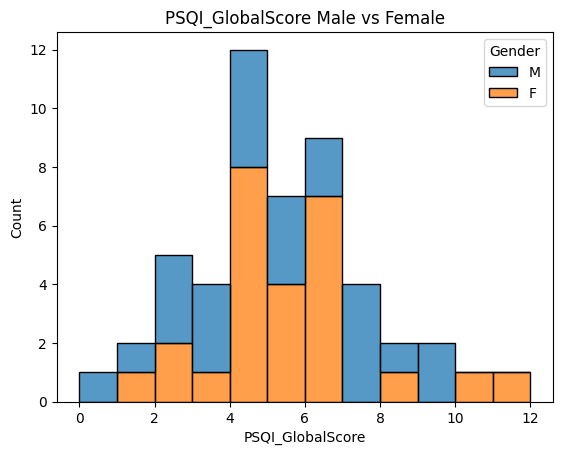

In [16]:
#plot for gender vs test results

sns.histplot(df, x = 'PSQI_GlobalScore', hue = 'Gender', multiple="stack")
plt.title('PSQI_GlobalScore'  + " Male vs Female")
    #axindex+=1

c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Westo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'PSQI_GlobalScore vs order of session')

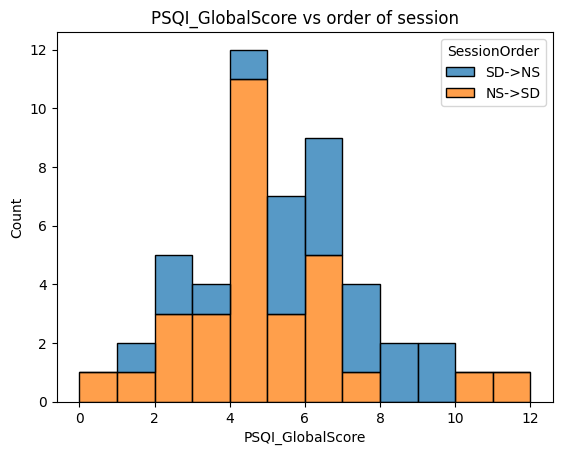

In [18]:
#plot for sample order vs test results

sns.histplot(df, x = 'PSQI_GlobalScore', hue = 'SessionOrder', multiple="stack")
plt.title('PSQI_GlobalScore'  + " vs order of session")

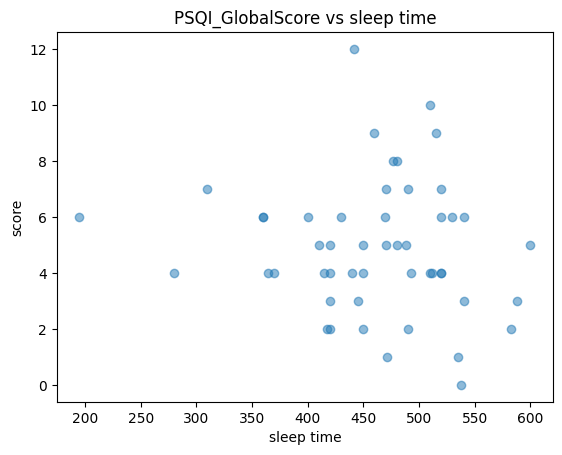

In [21]:
#plot for sleep hours vs test results

plt.scatter(df['Sleep_time'], df['PSQI_GlobalScore'], alpha = 0.5)
plt.title('PSQI_GlobalScore' + " vs sleep time")
plt.xlabel('sleep time')
plt.ylabel('score')
plt.show()

## ML Model

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
# encode categorical feature - gender
feature_df['Gender'] = feature_df['Gender'].apply(lambda x: 1 if x == 'M' else 2)
feature_df.fillna(0, inplace=True)

In [ ]:
X = feature_df.drop(columns=['participant_id', 'SessionOrder', 'Condition', 'PSQI_GlobalScore'])
y = feature_df['PSQI_GlobalScore']

# standardize the band powers
columns_not_to_scale = ['Gender', 'Age', 'Sleep_time']
columns_to_scale = [col for col in X.columns if col not in columns_not_to_scale]

transformers = [
    ('scale', StandardScaler(), columns_to_scale),
    ('pass', 'passthrough', columns_not_to_scale)
]

ct = ColumnTransformer(transformers, remainder='drop')
X = ct.fit_transform(X)

### Baseline Models

#### Linear Regression

In [ ]:
lr = LinearRegression()
mse_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Root Mean Squared Error across 10 folds: {mean_rmse:.2f} +/- {std_rmse:.2f}')



Root Mean Squared Error across 10 folds: 4.73 +/- 1.18


#### Ridge regression

In [ ]:
ridge = Ridge(alpha=1.0)
mse_scores = cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Root Mean Squared Error across 10 folds: {mean_rmse:.2f} +/- {std_rmse:.2f}')

Root Mean Squared Error across 10 folds: 3.81 +/- 1.02


#### Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=5)
mse_scores = cross_val_score(dt, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Root Mean Squared Error across 10 folds: {mean_rmse:.2f} +/- {std_rmse:.2f}')

Root Mean Squared Error across 10 folds: 3.31 +/- 0.85


#### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
mse_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Root Mean Squared Error across 10 folds: {mean_rmse:.2f} +/- {std_rmse:.2f}')

Root Mean Squared Error across 10 folds: 2.57 +/- 0.68


### Feature Engineering

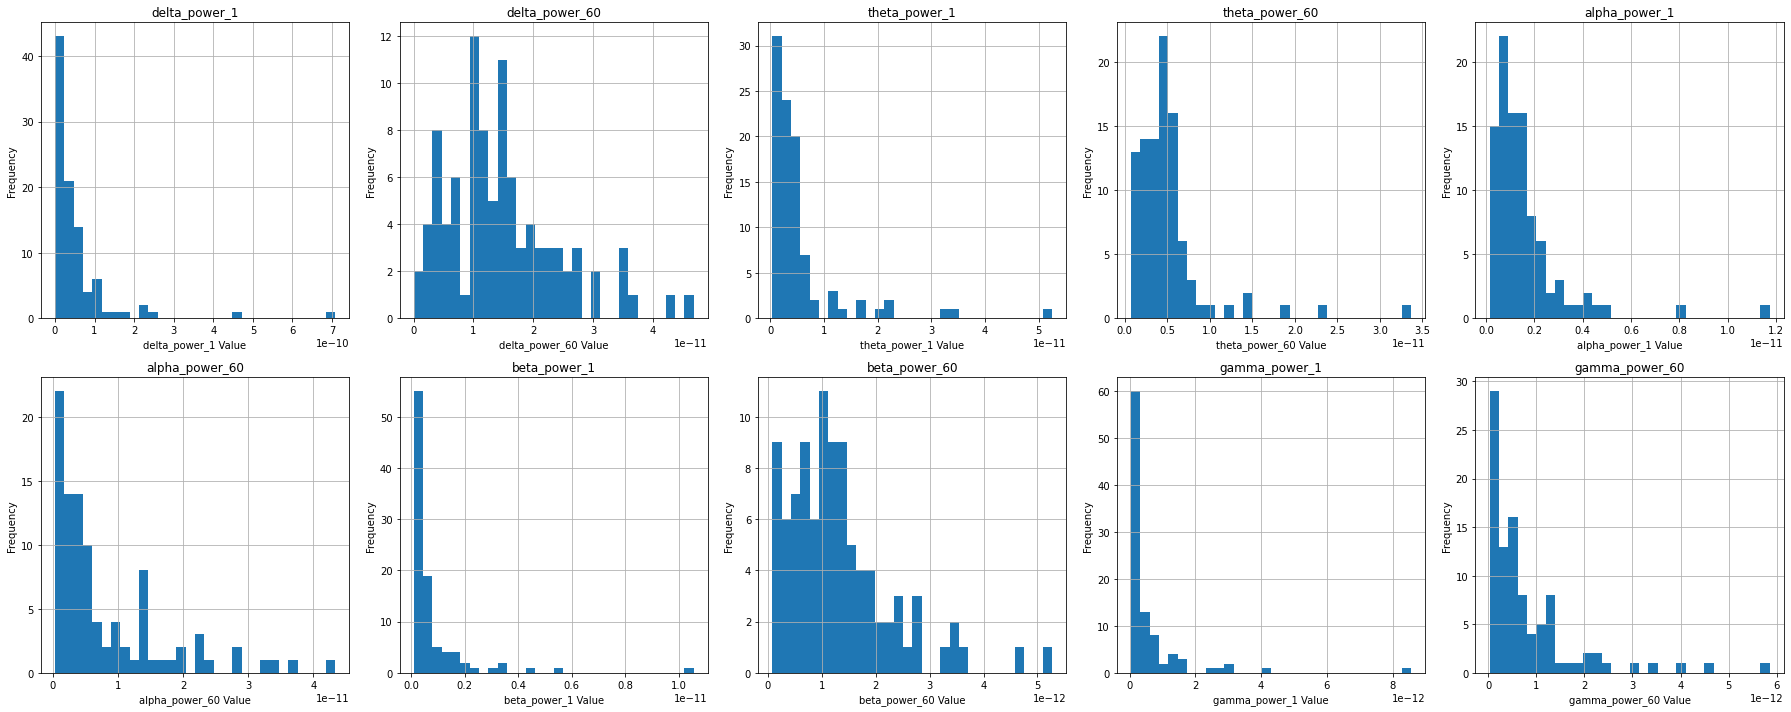

In [ ]:
example_cols = ['delta_power_1', 'delta_power_60', 'theta_power_1', 'theta_power_60',
                 'alpha_power_1', 'alpha_power_60', 'beta_power_1', 'beta_power_60',
                 'gamma_power_1', 'gamma_power_60']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    feature_df[example_cols[i]].hist(bins=30, ax=ax)
    ax.set_title(f'{example_cols[i]}')
    ax.set_xlabel(f'{example_cols[i]} Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

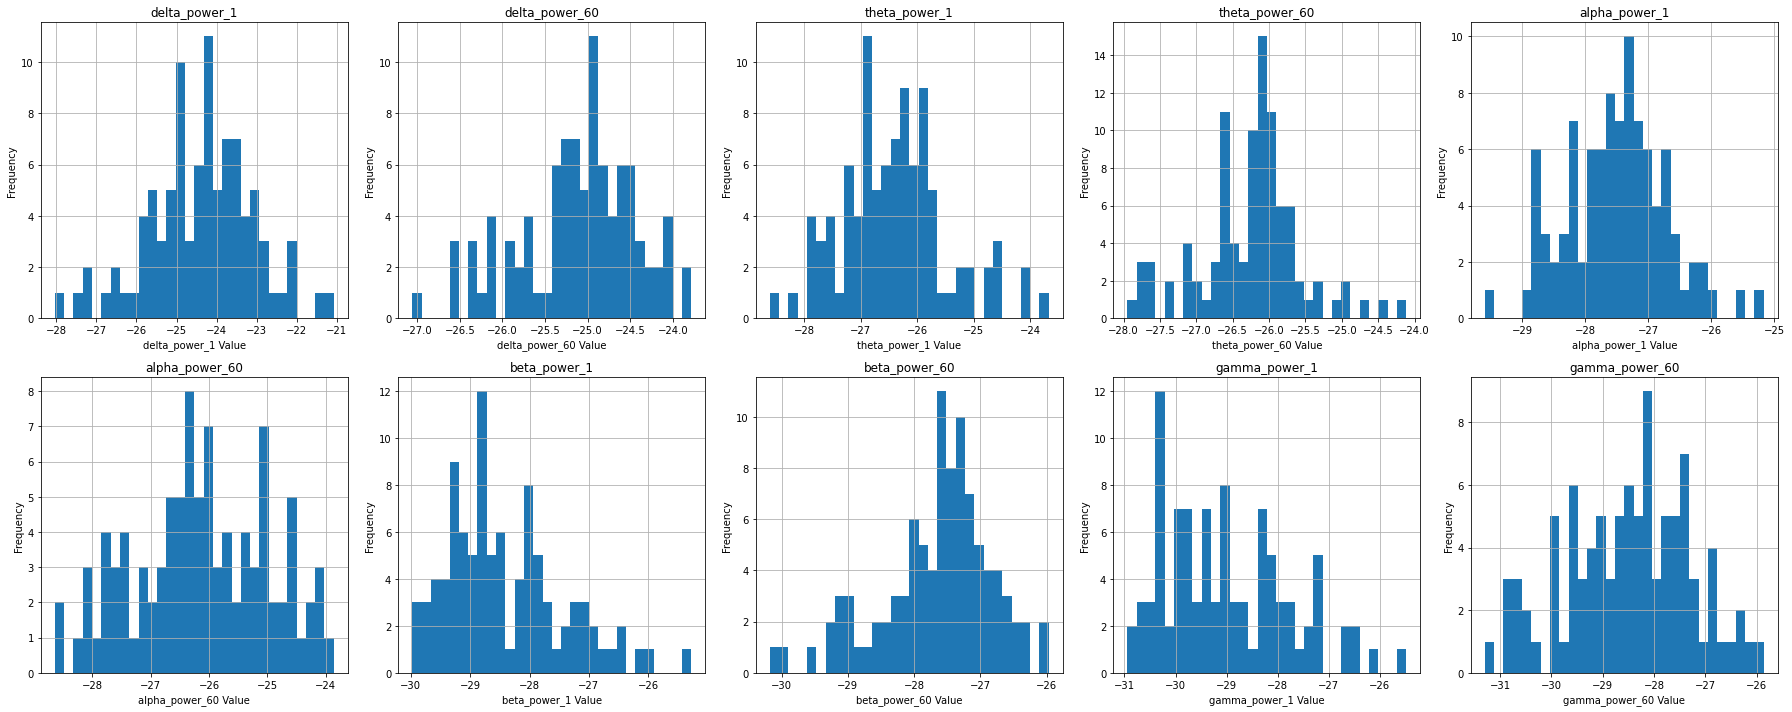

In [ ]:
example_cols = ['delta_power_1', 'delta_power_60', 'theta_power_1', 'theta_power_60',
                 'alpha_power_1', 'alpha_power_60', 'beta_power_1', 'beta_power_60',
                 'gamma_power_1', 'gamma_power_60']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    log_data = np.log(feature_df[example_cols[i]][feature_df[example_cols[i]] > 0])
    log_data.hist(bins=30, ax=ax)
    ax.set_title(f'{example_cols[i]}')
    ax.set_xlabel(f'{example_cols[i]} Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Apply Log Scale to Power Columns

In [ ]:
X = feature_df.drop(columns=['participant_id', 'SessionOrder', 'Condition', 'PSQI_GlobalScore'])
y = feature_df['PSQI_GlobalScore']

columns_not_to_scale = ['Gender', 'Age', 'Sleep_time']
columns_to_scale = [col for col in X.columns if col not in columns_not_to_scale]

for col in columns_to_scale:
    X[col] = np.log(X[col][X[col] > 0])
    X[col] = np.nan_to_num(X[col])
    X[col] = (X[col] - X[col].mean()) / X[col].std() if X[col].std() != 0 else (X[col] - X[col].mean())

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
mse_scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Root Mean Squared Error across 10 folds: {mean_rmse:.2f} +/- {std_rmse:.2f}')

Root Mean Squared Error across 10 folds: 2.56 +/- 0.76


Applying log scale didn't seem to boost performance.

In [ ]:
#pca = PCA(n_components=0.98)
#X_pca = pca.fit_transform(X)

#print("Original number of features:", X.shape[1])
#print("Reduced number of features:", X_pca.shape[1])
#explained_variance_ratio = pca.explained_variance_ratio_
#max_variance_index = np.argmax(explained_variance_ratio)
#features = X.columns.tolist()
#features[max_variance_index]

Original number of features: 308
Reduced number of features: 1


'Gender'

## Results

Despite fitting various models to the data and applying different transformations, the best model (random forest) only achieved an average RMSE of around 2.5 (PSQI_GlobalScore ranges from 0 to 12). There may be further steps to take to improve model performance, but this result shows a weak correlation between EEG signals alone and cognitive task performance scores. 

## Conclusion & Discussion

- Discussion of your results and how they address your experimental question
- Limitations of analysis discussed
- What additional experiments would be interesting, and what data would you need?

Some key limitations to this project are the size of data (50 participants' eeg data) and the lack of domain knowledge. Models would be better at capturing trends if there are more data to learn from. And with more domain knowledge in the field of neuroscience, we could construct more meaningful features from existing data (EEG signals especially) and spend more time on feature engineering to improve model accuracy. We did not understand the meaning behind the EEG waveslengths well. 

Some future directions could be the integration of baseline EEG activity into features, which would provide important information for the model to make prediction on since it would account for individual differences, which may increase model performance. In addition, other ways of transforming the EEG signals into meaningful lower-dimensional data can be explored to enhance model predictability. Using different tools such as an MRI could yield more insights to the effects of sleep deprivation as well. 